# **Task 03 - Boston House Price Predictions**
---

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
import pandas as pd
dataset = pd.read_csv("housing.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Dataset Properties

In [3]:
dataset.shape

(489, 4)

In [4]:
dataset.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [5]:
dataset.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [6]:
dataset.empty

False

In [7]:
dataset.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [8]:
dataset.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [9]:
dataset.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [10]:
dataset.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Visualizing the data

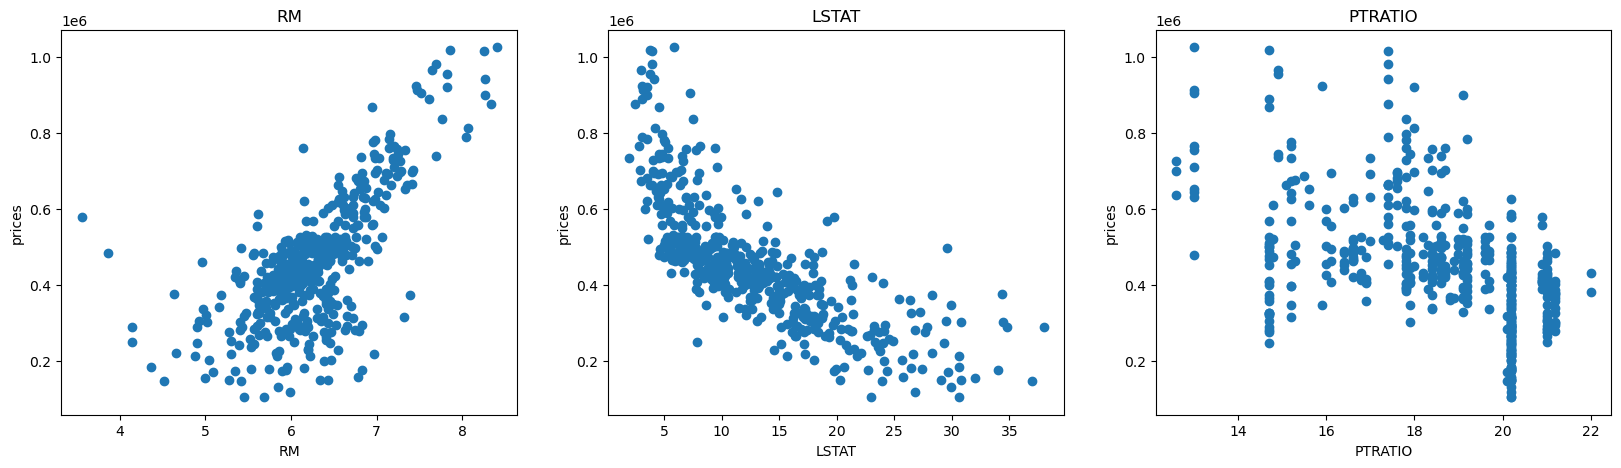

In [11]:
plt.figure(figsize=(20, 5))
features = dataset.drop('MEDV', axis = 1)

# i: index starts with 0
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    c = dataset[col]
    plt.plot(c, y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

## Splitting the dataset into Training set and Test set


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
print(f"Shape of\nX_train = {X_train.shape}\nX_test = {X_test.shape}\ny_train = {y_train.shape}\ny_test = {y_test.shape}")

Shape of
X_train = (391, 3)
X_test = (98, 3)
y_train = (391,)
y_test = (98,)


## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [20]:
X_train[0]

array([ 5.869,  9.8  , 20.2  ])

In [21]:
X_train_scaled[0]

array([-0.57729555, -0.42657057,  0.80699513])

## Training XGBoost on the training set

In [22]:
!pip install xgboost

In [23]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Predicting the Test set

In [24]:
y_pred = regressor.predict(X_test_scaled)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[309463.88 401100.  ]
 [492401.12 501900.  ]
 [287339.69 319200.  ]
 [242068.86 147000.  ]
 [195642.62 247800.  ]
 [439123.94 388500.  ]
 [240296.08 266700.  ]
 [888487.88 980700.  ]
 [409307.34 367500.  ]
 [576903.44 489300.  ]
 [435112.72 396900.  ]
 [391831.44 394800.  ]
 [184360.98 268800.  ]
 [443097.91 405300.  ]
 [359310.88 279300.  ]
 [502084.62 508200.  ]
 [341026.91 264600.  ]
 [345915.   296100.  ]
 [353978.44 228900.  ]
 [450467.5  451500.  ]
 [453588.66 445200.  ]
 [476377.78 621600.  ]
 [262689.88 359100.  ]
 [745993.94 743400.  ]
 [476117.72 420000.  ]
 [492179.03 436800.  ]
 [381386.62 357000.  ]
 [738074.69 672000.  ]
 [758114.12 743400.  ]
 [184502.27 105000.  ]
 [535151.06 556500.  ]
 [397573.88 329700.  ]
 [566097.81 516600.  ]
 [457174.19 466200.  ]
 [316894.56 275100.  ]
 [501557.28 491400.  ]
 [575906.5  504000.  ]
 [485446.31 396900.  ]
 [685206.31 661500.  ]
 [703176.5  732900.  ]
 [347738.97 350700.  ]
 [433608.84 315000.  ]
 [313204.5  245700.  ]
 [374111.22

## Evaluating the Model Performance

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8294801046654325

## Applying k-Fold Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train_scaled, y = y_train, cv = 10)

In [27]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.96 %
Standard Deviation: 6.99 %
